# DATA MINING & ORGANIZAR LOS DATOS

In [2]:
import pandas as pd
from IPython.core.display import HTML
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

data=load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
data["data"]
#data.data

data_df=pd.DataFrame(data=data.data,columns=data.feature_names)
display(HTML(data_df.to_html()))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [4]:
data.target
target=pd.DataFrame(data=data.target,columns=["species"])
display(HTML(target.to_html()))

,species
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [5]:
iris=pd.concat([data_df,target],axis=1)
display(HTML(iris.to_html()))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [11]:
iris.rename({
    "sepal length (cm)":"sepal_length",
    "sepal width (cm)":"sepal_width",
    "petal length (cm)":"petal_length",
    "petal width (cm)":"petal_width"   
},axis=1,inplace=True)
display(HTML(iris.to_html()))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [6]:
#https://docs.hektorprofe.net/python/funcionalidades-avanzadas/funcion-map/#:~:text=La%20función%20map()%20se,que%20tengan%20la%20misma%20longitud.
#https://www.digitalocean.com/community/tutorials/how-to-use-the-python-map-function-es
iris["species"]=iris.species.map(lambda x:data.target_names[x])
#la funcion map con lamba hace una especie de reemplazo al bucle for,
#aplica una accion a cada miembro  de la lista que estamos modificando
#en este caso busca la posicion target_names[0],target_names[1],target_names[2]
#y reemplaza por su respectivo valor que seria el nombre de la especie

display(HTML(iris.to_html()))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [7]:
iris.isna().sum()#verificamos si hay valores nulos NaN

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

# ANALISIS DE LOS DATOS

In [8]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
PRIMER ANALISIS

Entre mas grande sea la desviacion estandar (mas lejos esta el punto del modelo) menos parecido
es la muestra del modelo
desviacion estandar alta es malo!!!!!!!!!

si al desviacion estandar es pequeña hay mas correlacion
recordemos que la correlacion es que tanto se parece la muestra al modelo


Analizamos desviacion estandar

petal_length tiene la mayor desviación estándar en comparación con otras características,
petal_width parece tener un rango de valores más estrecho
Sería mejor realizar una regularización después de comprobar el rendimiento 
del modelo debido a las diferencias de escala entre las características.

In [9]:
iris.corr()#correlacion:analiza la relacion (que tanto se parecen) las caracteristicas

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [ ]:
El coeficiente de correlación de la petal_length
y de petal_width es de 0,962865, que es extremadamente alto. 
Dado que las características altamente correlacionadas pueden inducir problemas (IA)
de multicolinealidad, se recomienda seleccionar una de las dos variables a utilizar.
o mejor, mirar como diferenciar haciendo un deep trainig con las otras caracteristicas

In [10]:
iris.groupby("species").size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [19]:
 iris.groupby("species").count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [ ]:
Seleccione entre "size" y "count" dependiendo del propósito del análisis,
ya que "size" cuenta el número de datos que incluyen valores NaN,
mientras que "count" cuenta el número de datos sin valores NaN.
En este caso, no hay diferencia entre "size" y "count" porque los datos de 
iris no tienen valores NaN.

# GRAFICAS REPRESENTATIVAS

# box plot -> diagrama de caja

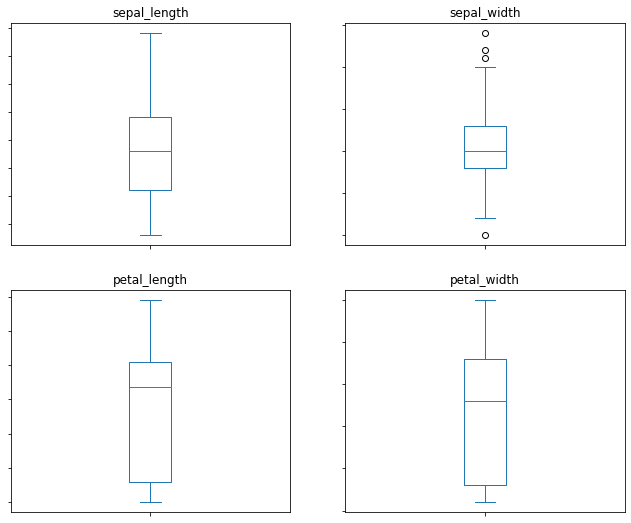

In [20]:
#https://byjus.com/maths/box-plot/

def boxplot_iris(feature_names,dataset):
    i=1
    plt.figure(figsize=(11,9))
    
    for col in feature_names:
        plt.subplot(2,2,i)
        plt.axis("on")
        plt.tick_params(axis="both",
                        left=True,
                        top=False,
                        right=False,
                        bottom=True,
                        labelleft=False,
                        labeltop=False,
                        labelright=False,
                        labelbottom=False)
        dataset[col].plot(kind="box",subplots=True,sharex=False)
        plt.title(col)
        i+=1
    plt.show()
    
boxplot_iris(iris.columns[:-1],iris)

In [ ]:
Dado que las longitudes de las cajas de sepal_length y sepal_width son cortas,
se puede deducir que la tendencia de centralización de los datos es alta. 
El valor atípico se detecta en petal_width, y la longitud de caja larga de petal_length
y petal_width indica que los datos están más ampliamente distribuidos. 

# HISTOGRAMA

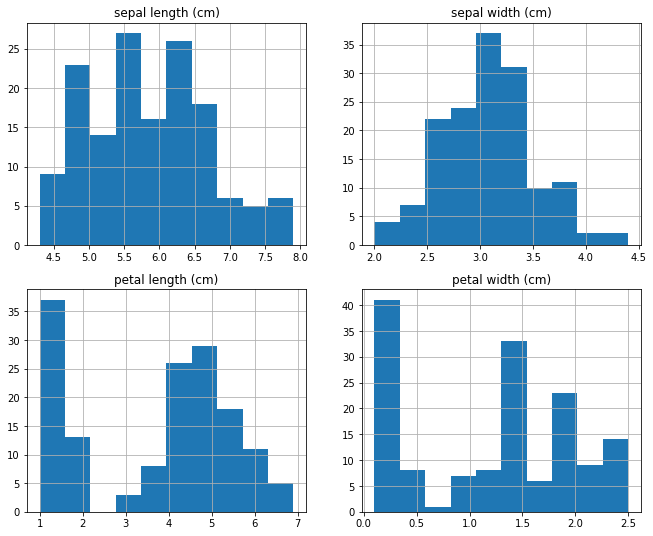

In [11]:
def hisplot_iris(feature_names,dataset):
    i=1
    plt.figure(figsize=(11,9))
    
    for col in feature_names:
        plt.subplot(2,2,i)
        plt.axis("on")
        plt.tick_params(axis="both",
                        left=True,
                        top=False,
                        right=False,
                        bottom=True,
                        labelleft=True,
                        labeltop=False,
                        labelright=False,
                        labelbottom=True)
        dataset[col].hist()
        plt.title(col)
        i+=1
    plt.show()
    
hisplot_iris(iris.columns[:-1],iris)

In [ ]:
La frecuencia del intervalo de clase de la mediana es alta para sepal_width, 
y se vuelve más baja a medida que se aleja del centro. 
En el diagrama de caja, la longitud de la caja de sepal_width es corta porque se agregaron muchos datos en la mediana.
En el caso de la petal_width, la frecuencia del intervalo de clase de la mediana es alta, pero hay muchos datos en 
el intervalo de clase de la izquierda. 
En el gráfico de caja, la caja de petal_lengh es larga hasta el fondo porque hay muchos 
datos en valores inferiores. 


In [ ]:
Ejemplo incompleto continua en semana 13